In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
%matplotlib inline

from sklearn.preprocessing import minmax_scale

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/e_commerce_data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# 데이터 EDA & 전처리

## 기본 데이터 확인

In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


- 연속형 변수라고 지칭하기 어려운 데이터들이 있다.

In [5]:
for col in df.columns:
    print(f'{col} unique len : {df[col].nunique()}')
    print(f'unique of {col} : {df[col].unique()}')
    print('-'*50)

InvoiceNo unique len : 25900
unique of InvoiceNo : ['536365' '536366' '536367' ... '581585' '581586' '581587']
--------------------------------------------------
StockCode unique len : 4070
unique of StockCode : ['85123A' '71053' '84406B' ... '90214U' '47591b' '23843']
--------------------------------------------------
Description unique len : 4223
unique of Description : ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'lost'
 'CREAM HANGING HEART T-LIGHT HOLDER' 'PAPER CRAFT , LITTLE BIRDIE']
--------------------------------------------------
Quantity unique len : 722
unique of Quantity : [     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     56     72    200
    600    480     -6     14     -2     11     33     13     -4     -

## 결측치 처리

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df['CustomerID'].unique()

array([17850., 13047., 12583., ..., 13298., 14569., 12713.])

In [8]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [9]:
df.dropna(subset=['CustomerID'], how='all', inplace=True)
df.shape

(406829, 8)

In [10]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

## 이상치 확인

In [11]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


- 수량(Quantity)에 음수? -> 반품일 수도 
    - 수량이 마이너스인 사유가 나와있지 않아서 분석에 용이하지 않다.
    - 음수값은 삭제하도록 한다.

In [12]:
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
df = df[df['Quantity'] > 0]

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [15]:
df[df['Quantity'] > 1000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
4850,536809,84950,ASSORTED COLOUR T-LIGHT HOLDER,1824,12/2/2010 16:48,0.55,15299.0,United Kingdom
4945,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,12/2/2010 17:38,0.18,16754.0,United Kingdom
4946,536830,21915,RED HARMONICA IN BOX,1400,12/2/2010 17:38,1.06,16754.0,United Kingdom
6365,536890,17084R,ASSORTED INCENSE PACK,1440,12/3/2010 11:48,0.16,14156.0,EIRE
16435,537659,22189,CREAM HEART CARD HOLDER,1008,12/7/2010 16:43,2.31,18102.0,United Kingdom
...,...,...,...,...,...,...,...,...
533812,581115,22413,METAL SIGN TAKE IT OR LEAVE IT,1404,12/7/2011 12:20,2.75,15195.0,United Kingdom
534952,581175,23084,RABBIT NIGHT LIGHT,1440,12/7/2011 15:16,1.79,14646.0,Netherlands
540070,581458,22197,POPCORN HOLDER,1500,12/8/2011 18:45,0.72,17949.0,United Kingdom
540071,581459,22197,POPCORN HOLDER,1200,12/8/2011 18:46,0.72,17949.0,United Kingdom


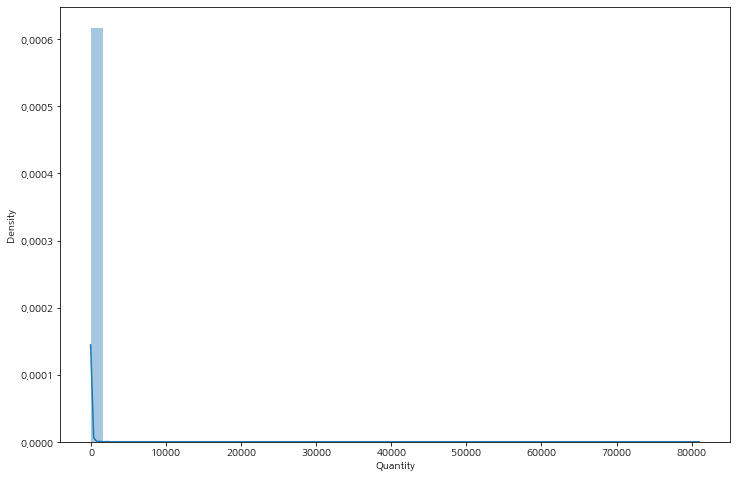

In [16]:
plt.figure(figsize=(12, 8))
sns.distplot(df['Quantity'])
plt.show()

In [17]:
# 이용 고객수(4,338명), 이용품목건수(510만건), 이용 나라(37개국)
df['CustomerID'].nunique(), df['Quantity'].sum(), df['Country'].nunique()

(4339, 5181696, 37)

In [18]:
# 인당 평균 구매 건수는 약 92건
df.groupby('CustomerID')['Country'].count().mean()

91.70868863793501

In [19]:
# 인당 구매 건수는 최소 1에서 최대 7847건
df.groupby('CustomerID')['Country'].count().min(), df.groupby('CustomerID')['Country'].count().max()

(1, 7847)

# RFM 지표 계획

최근성(Recency), 구매빈도(Frequency), 구매금액(Monetary) 3가지의 지표들을 통해서 고객 점수 부여 및 등급화

## 최근성(Recency)

In [20]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [22]:
df['Date'] = pd.to_datetime(df['InvoiceDate'].str.split(' ').str[0])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  object        
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
 8   Date         397924 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 38.4+ MB


In [23]:
df['Date'].min(), df['Date'].max()

(Timestamp('2010-12-01 00:00:00'), Timestamp('2011-12-09 00:00:00'))

In [24]:
# 고객 ID별 최근 구매일
recency_df = df.groupby('CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID', 'LastPurchaseDate']
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [32]:
recency_df['LastPurchaseDate'][0]

Timestamp('2011-01-18 00:00:00')

In [33]:
# 고객 ID별 최근 구매일로부터 지난 날짜 : day
recency_df['recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (df['Date'].max() - x).days) 
recency_df.head()

,CustomerID,LastPurchaseDate,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


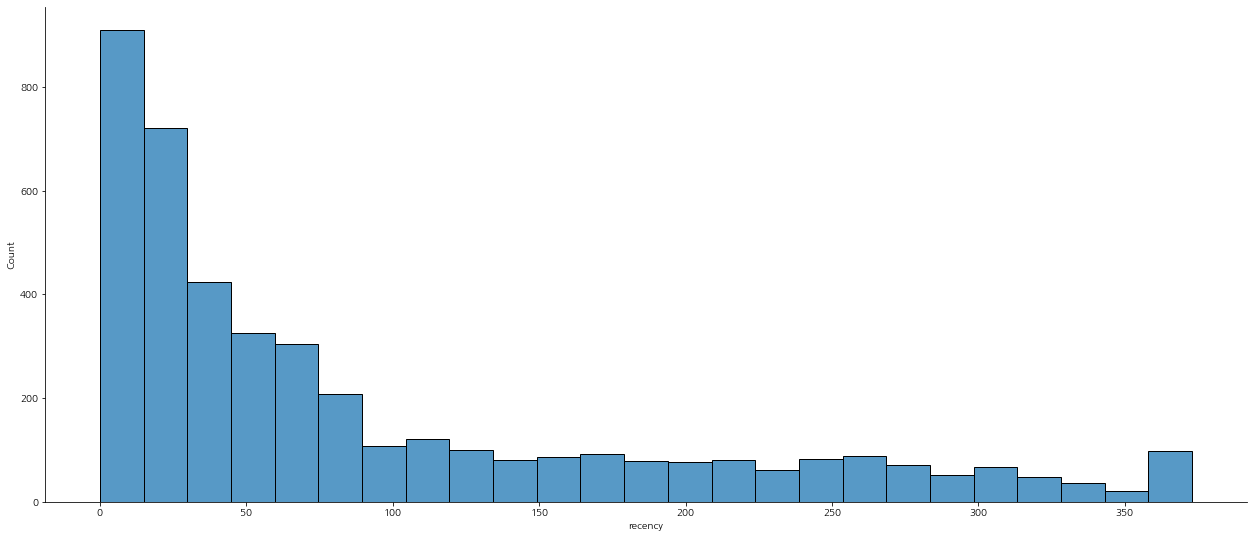

In [37]:
# 고객의 비율이 최근에 구매를 했던 비율이 더 높다
sns.displot(data=recency_df, x='recency')
plt.gcf().set_size_inches(20, 8)
plt.show()

## 구매빈도(Frequency)

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01


In [44]:
frequency_df = df.drop_duplicates(subset=['CustomerID', 'InvoiceNo'], keep='first')
frequency_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,12/1/2010 8:35,5.95,13047.0,United Kingdom,2010-12-01


In [45]:
frequency_df = frequency_df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID', 'frequency']
frequency_df.head()

,CustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


## 구매금액(Monetary)

In [46]:
df['total_cost'] = df['UnitPrice'] * df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,total_cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [47]:
monetary_df = df.groupby('CustomerID', as_index=False)['total_cost'].sum()
monetary_df.columns = ['CustomerID', 'monetary']
monetary_df.head()

,CustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


## RFM 데이터 합치기

In [48]:
recency_df.head()

,CustomerID,LastPurchaseDate,recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [54]:
recency_df.drop('LastPurchaseDate', axis=1, inplace=True)
recency_df.head()

,CustomerID,recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


In [49]:
frequency_df.head()

,CustomerID,frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


In [50]:
monetary_df.head()

,CustomerID,monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [56]:
rfm = pd.merge(recency_df, frequency_df, on='CustomerID')
rfm = pd.merge(rfm, monetary_df, on='CustomerID')

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


# RFM 지표 활용 서비스 이용 수준 측정

## data MinMaxScaling : 
- 최소값 0에서 최대값 1 사이의 값들로 스캐일링

In [57]:
# recency는 숫자가 작을수록 최근 구매일이기에 점수가 더 높아야 한다. 그래서 스캐일링 후 역수를 취해야 한다.
rfm['recency'] = minmax_scale(rfm['recency'], axis=0, copy=True)
rfm['recency'] = 1 - rfm['recency']
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,0.128686,1,77183.60
1,12347.0,0.994638,7,4310.00
2,12348.0,0.798928,4,1797.24
3,12349.0,0.951743,1,1757.55
4,12350.0,0.168901,1,334.40


In [58]:
# frequency, monetary scaling
rfm['frequency'] = minmax_scale(rfm['frequency'], axis=0, copy=True)

rfm['monetary'] = minmax_scale(rfm['monetary'], axis=0, copy=True)

rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,0.128686,0.000000,0.275453
1,12347.0,0.994638,0.028708,0.015382
2,12348.0,0.798928,0.014354,0.006414
3,12349.0,0.951743,0.000000,0.006272
4,12350.0,0.168901,0.000000,0.001193


In [59]:
rfm['score'] = rfm['recency'] + rfm['frequency'] + rfm['monetary']
rfm.head()

,CustomerID,recency,frequency,monetary,score
0,12346.0,0.128686,0.000000,0.275453,0.404139
1,12347.0,0.994638,0.028708,0.015382,1.038728
2,12348.0,0.798928,0.014354,0.006414,0.819696
3,12349.0,0.951743,0.000000,0.006272,0.958015
4,12350.0,0.168901,0.000000,0.001193,0.170094


In [62]:
# score scaling : 점수 등급 100이 최대값
rfm['score'] = minmax_scale(rfm['score'], axis=0, copy=True) * 100
rfm['score'] = round(rfm['score'], 0)
rfm.head()

,CustomerID,recency,frequency,monetary,score
0,12346.0,0.128686,0.000000,0.275453,16.0
1,12347.0,0.994638,0.028708,0.015382,42.0
2,12348.0,0.798928,0.014354,0.006414,33.0
3,12349.0,0.951743,0.000000,0.006272,39.0
4,12350.0,0.168901,0.000000,0.001193,7.0


## Grade 등급 지정